<div class="alert alert-block alert-danger">
<b>UWAGI PROWADZĄCEGO</b> Jaki krok wybrać - dużo losowych eksperymentów - po ilu iteracjach będziemy kończyć z danym krokiem - dla mnóstwa różnych kroków; minimum, maksimum, mediany; boxplot (kwantyle) - jak się rozkłada tempo zbiegu jako można zagregować wyniki eksperymentów losowych
</div>

### Importowanie modułów

Poniżej umieszczone zostały niezbędne importy funkcji z bibliotek, które zostały wykorzystane do realizacji zadania.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Dla wykresu 3D będziemy również potrzebowali zaimportowania ...

In [20]:
from mpl_toolkits import mplot3d

## Funkcja f(x)

### Definicja

Definiujemy funkcję f(x) (zgodnie z treścią zawartą w zadaniu) - o nazwie *f_function*. Argumentem na wejście funkcji *f_function* jest dana zmienna niezależna (oznaczona jako *indepedent_variable*) - wartość współrzędnej x (później w kodzie będzie ona oznaczona jako m.in. *x_value*), zaś na wyjściu funkcja zwraca obliczoną zgodnie z formułą wartość zmiennej zależnej - *dependent_variable* (nazywaną później jako *y*).

In [21]:
def f_function(independent_variable):
       dependent_variable = 10*(independent_variable**4) + 3*(independent_variable**3) - 30*(independent_variable**2) + 10*independent_variable
       return dependent_variable

### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji f(x)

Tworzymy listy: 
- *x_values*, zawierającą dziedzinę - badany (interesujący nas) zakres funkcji f(x),
- *y_values*, zawierającą zbiór wartości funkcji f(x) dla danych argumentów x z *x_values*.

In [52]:
x_values = np.linspace(-3, 2.2)
y_values = [f_function(x) for x in  x_values]

#### Ustawienie rozmiaru wykresu f(x)

W tej komórce kodu jesteśmy w stanie ustawić rozmiary wykresu, w celu jak najlepszego zwizualizowania danych.

In [53]:
plt.rcParams["figure.figsize"] = (40,20)

### Generowanie wykresu funkcji f(x)

Tworzymy wykres funkcji f(x) w celu zobrazowania jej przebiegu.

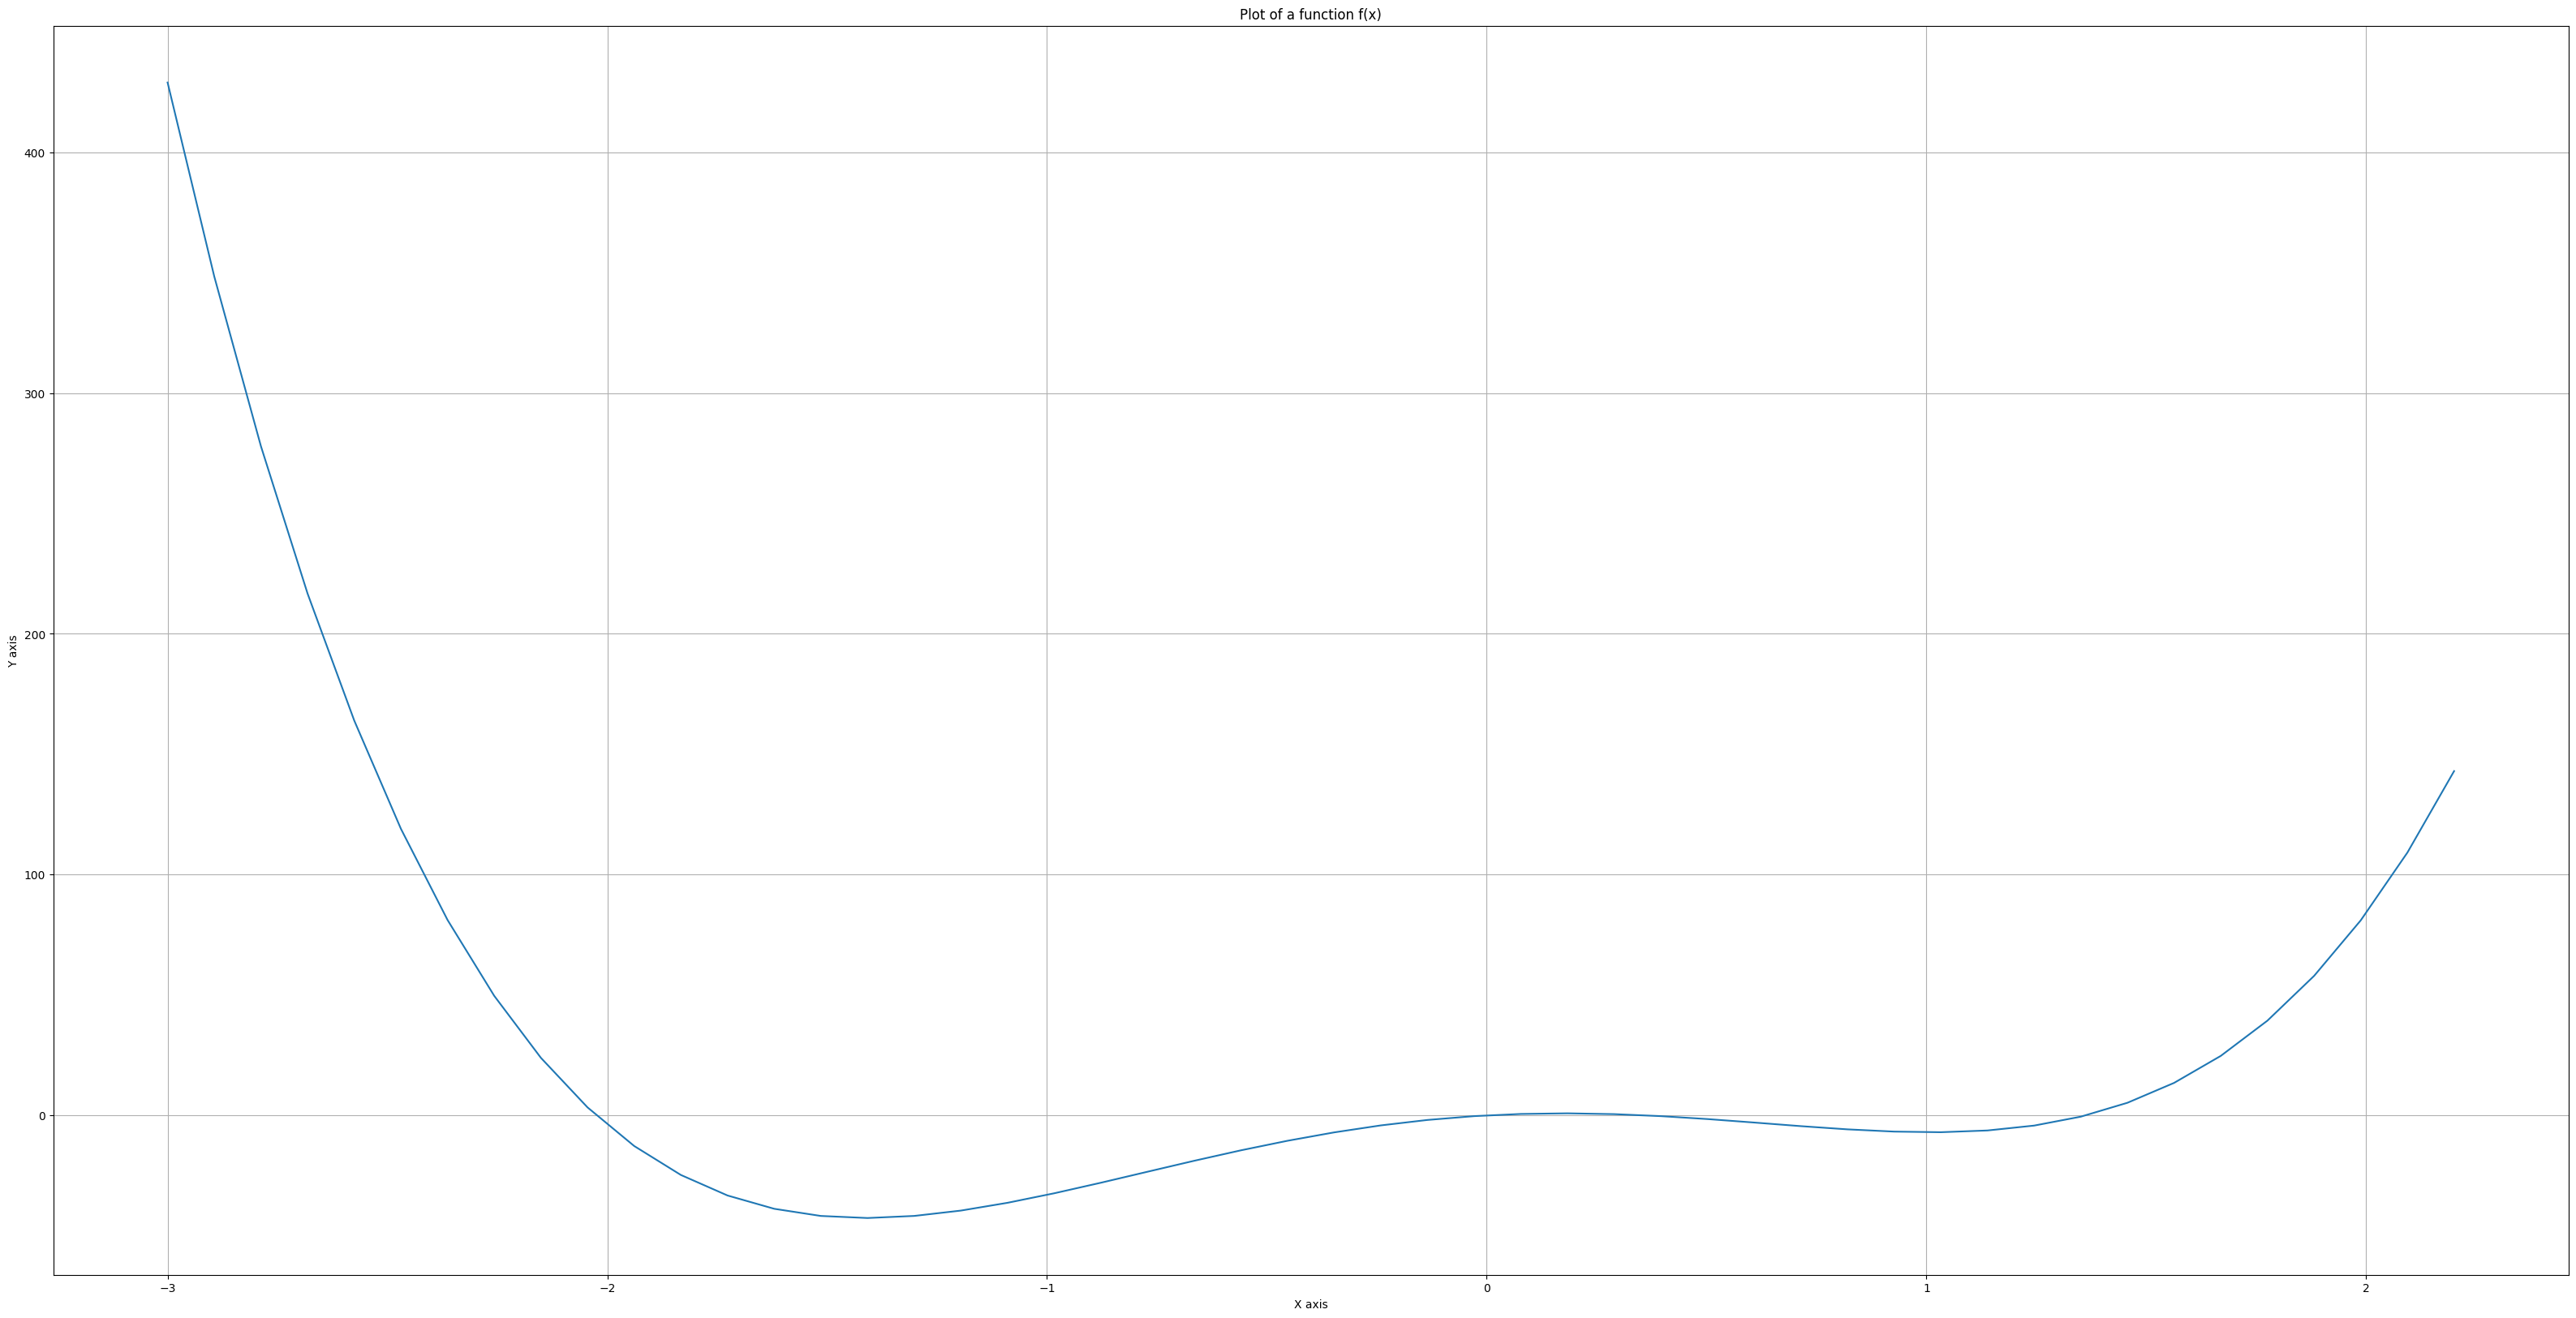

In [54]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)')
ax.grid()


plt.show()

## Funkcja g(x)

### Definicja

Definiujemy funkcję g(x) (zgodnie z treścią zawartą w zadaniu) - o nazwie *g_function*. Argumentami na wejście funkcji *g_function* są dane zmienne niezależne (oznaczone jako first oraz second *indepedent_variable*) - wartości współrzędnej x1 oraz wartości współrzędnej x2 (które później w kodzie oznaczone są odpowiednio jako *x_value*, *y_value*), zaś na wyjściu funkcja zwraca obliczoną zgodnie z formułą wartość zmiennej zależnej - *dependent_variable* (nazywaną później jako *z*).

In [25]:
def g_function(first_independent_variable, second_independent_variable):
    dependent_variable = 10*second_independent_variable**4 + 10*first_independent_variable**4 + 3*first_independent_variable**3 - 30*first_independent_variable**2 + 10*first_independent_variable
    return dependent_variable

### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji g(x)

Tworzymy listy: 
- *x_values*, zawierającą dziedzinę pierwszej zmiennej niezależniej - badany (interesujący nas) zakres funkcji g(x, y),
- *y_values*, zawierającą dziedzinę drugiej zmiennej niezależniej - badany (interesujący nas) zakres funkcji g(x, y),
- *z_values*, zawierającą zbiór wartości funkcji g(x, y) dla danych argumentów x z *x_values* oraz y z *y_values*.

In [55]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)

#### Ustawienie rozmiaru wykresu g(x)

W tej komórce kodu jesteśmy w stanie ustawić rozmiary wykresu, w celu jak najlepszego zwizualizowania danych.

In [56]:
plt.rcParams["figure.figsize"] = (20,10)

### Generowanie wykresu funkcji g(x)

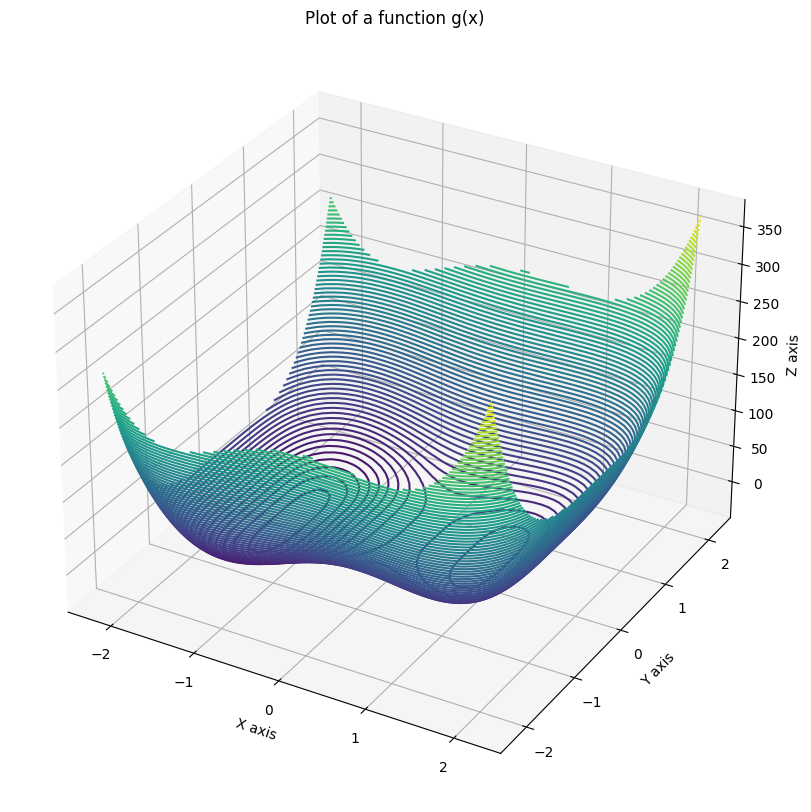

In [57]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 100, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

# ax.view_init(60, 35)

plt.show()

## Algorytm najszybszego spadku

#### Warunki stopu

Warunki stopu w zaimplementowanym algorytmie to liczba iteracji (nie może zostać przekroczona podana liczba iteracji funkcji - wówczas funkcja kończy się - nie mamy jednak pewności, czy na wyjściu otrzymany punkt wykresu jest minimum lokalnym/globalnym ) oraz precyzja (algorytm pomyślnie zatrzymuje się, gdy różnica między badanym wcześniej a aktualnym punktem wykresu jest mniejsza, niż precyzja - oznacza to, że znaleźliśmy się w minimum lokalnym/globalnym).

In [29]:
stop_precision_criteria = 10**(-4)
stop_iteration_criteria = 1000

values_of_beta = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

#### Gradient funkcji f(x)

Zdefiniowana funkcja oblicza gradient funkcji jednej zmiennej f (formuła zgodna z treścią zadania).

In [30]:
def calculate_f_function_gradient(x_coordinate):
    return 40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10

#### Gradient funkcji g(x)

Zdefiniowana funkcja oblicza gradient funkcji dwóch zmiennych g (formuła zgodna z treścią zadania).

In [31]:
def calculate_g_function_gradient(x_coordinate, y_coordinate):
    return [40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10, 40*y_coordinate**3]

### Algorytm najszybszego spadku dla funkcji jednej zmiennej f(x)

Zaimplementowany algorytm najniższego spadku dla funkcji jednej zmiennej f(x). *gradient_descent_2d* jako argumenty przyjmuje rozmiar kroku, punkt startowy (z którego algorytm rozpoczyna "poszukiwania" minimum) oraz współczynnik betę, czyli tzw. rozmiar kroku, zaś funkcja zwraca krotkę zawierającą następujące informacje - listę punktów "przeszukanych" (lista zawiera wartości współrzędnych *x*), odnalezione minimum oraz liczbę iteracji. Ostatnie dwie informacje są zwracane jako *None*, jeżeli nie został otrzymamy pomyślny wynik działania algorytmu (liczba iteracji równa się tej, która podana została jako warunek stopu zatrzyymujący działanie algorytmu).

In [32]:
def gradient_descent_2d(step_size, starting_point_x, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        starting_point_x = round(starting_point_x - beta * calculate_f_function_gradient(previous_x), 10)
        step_size = abs(starting_point_x - previous_x)
        iteration_counter += 1
        x_coordinates_analysed_points.append(starting_point_x)
    if iteration_counter >= stop_iteration_criteria:
        return x_coordinates_analysed_points, None, None
    else:
        return x_coordinates_analysed_points, starting_point_x, iteration_counter

### Algorytm najszybszego spadku dla funkcji dwóch zmiennych g(x)

Zaimplementowany algorytm najniższego spadku dla funkcji jednej zmiennej g(x). *gradient_descent_3d* jako argumenty przyjmuje rozmiar kroku, punkt startowy (z którego algorytm rozpoczyna "poszukiwania" minimum) oraz współczynnik betę, czyli tzw. rozmiar kroku, zaś funkcja zwraca krotkę zawierającą następujące informacje - krotkę zawierającą listy punktów "przeszukanych" (listy zawierają odpowiednio wartości współrzędnych *x* oraz *y* analizowanych punktów), odnalezione minimum oraz liczbę iteracji. Ostatnie dwie informacje są zwracane jako *None*, jeżeli nie został otrzymamy pomyślny wynik działania algorytmu (liczba iteracji równa się tej, która podana została jako warunek stopu zatrzyymujący działanie algorytmu).

In [33]:
def gradient_descent_3d(step_size, starting_point_x, starting_point_y, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    y_coordinates_analysed_points = [starting_point_y]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        previous_y = starting_point_y
        starting_point_x = round(starting_point_x - beta * calculate_g_function_gradient(previous_x, previous_y)[0], 10)
        starting_point_y = round(starting_point_y - beta * calculate_g_function_gradient(previous_x, previous_y)[1], 10)
        step_size = max(abs(starting_point_x - previous_x), abs(starting_point_y - previous_y))
        iteration_counter +=1
        x_coordinates_analysed_points.append(starting_point_x)
        y_coordinates_analysed_points.append(starting_point_y)
    if iteration_counter >= stop_iteration_criteria:
        return (x_coordinates_analysed_points, y_coordinates_analysed_points), None, None
    else:
        return (x_coordinates_analysed_points, y_coordinates_analysed_points), (starting_point_x, starting_point_y), iteration_counter

#### Informacja o otrzymanym wyniku działania algorytmu 

In [34]:
def algorithm_results(local_minimum):
    if local_minimum is None:
        print("The algorithm couldn't find local/global minimum for the provided data- it could be due to too few performed iterations. If neccesary increase number of possible iterations.")

## Sprawdzenie działania zaimplementowanego algorytmu

### Dla funkcji jednej zmiennej f(x)

Wyniki działania algorytmu najszybszego spadku dla funkcji jednej zmiennej przypisujemy do zmiennych *analysed_graph_points_2d*, *local_minimum_2d* oraz *iterations_performed_2d* - dane te będą wykorzystane w generowaniu wykresu. 

In [60]:
analysed_graph_points_2d, local_minimum_2d, iterations_performed_2d = gradient_descent_2d(1, -3, 0.001)
x_minimum_2d = local_minimum_2d
algorithm_results(local_minimum_2d)

##### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji f(x)

Tworzymy dziedzinę i zbiór wartości funkcji f(x), dla których badany będzie algorytm najszybszego spadku.

In [59]:
x_values = np.linspace(-3, 2.2)
y_values = [f_function(x) for x in  x_values]

#### Wykres funkcji f(x) wraz z przebiegiem oraz wynikiem (szukanym minimum) działania algorytmu *najszybszego spadku* dla funkcji jednej zmiennej

Generujemy wykres przebiegu algorytmu dla funkcji jednej zmiennej f(x). Ciągła niebieska linia reprezentuje wykres f(x), czerwone kropki - kolejne badane punkty przez algorytm zaś czarny krzyżyk - znalezione przez algorytm minimum globalne.
<br><br>
Widzimy, że działanie algorytmu jest poprawne - funkcja "zatrzymuje się" w odpowiednim punkcie wykresu f(x).

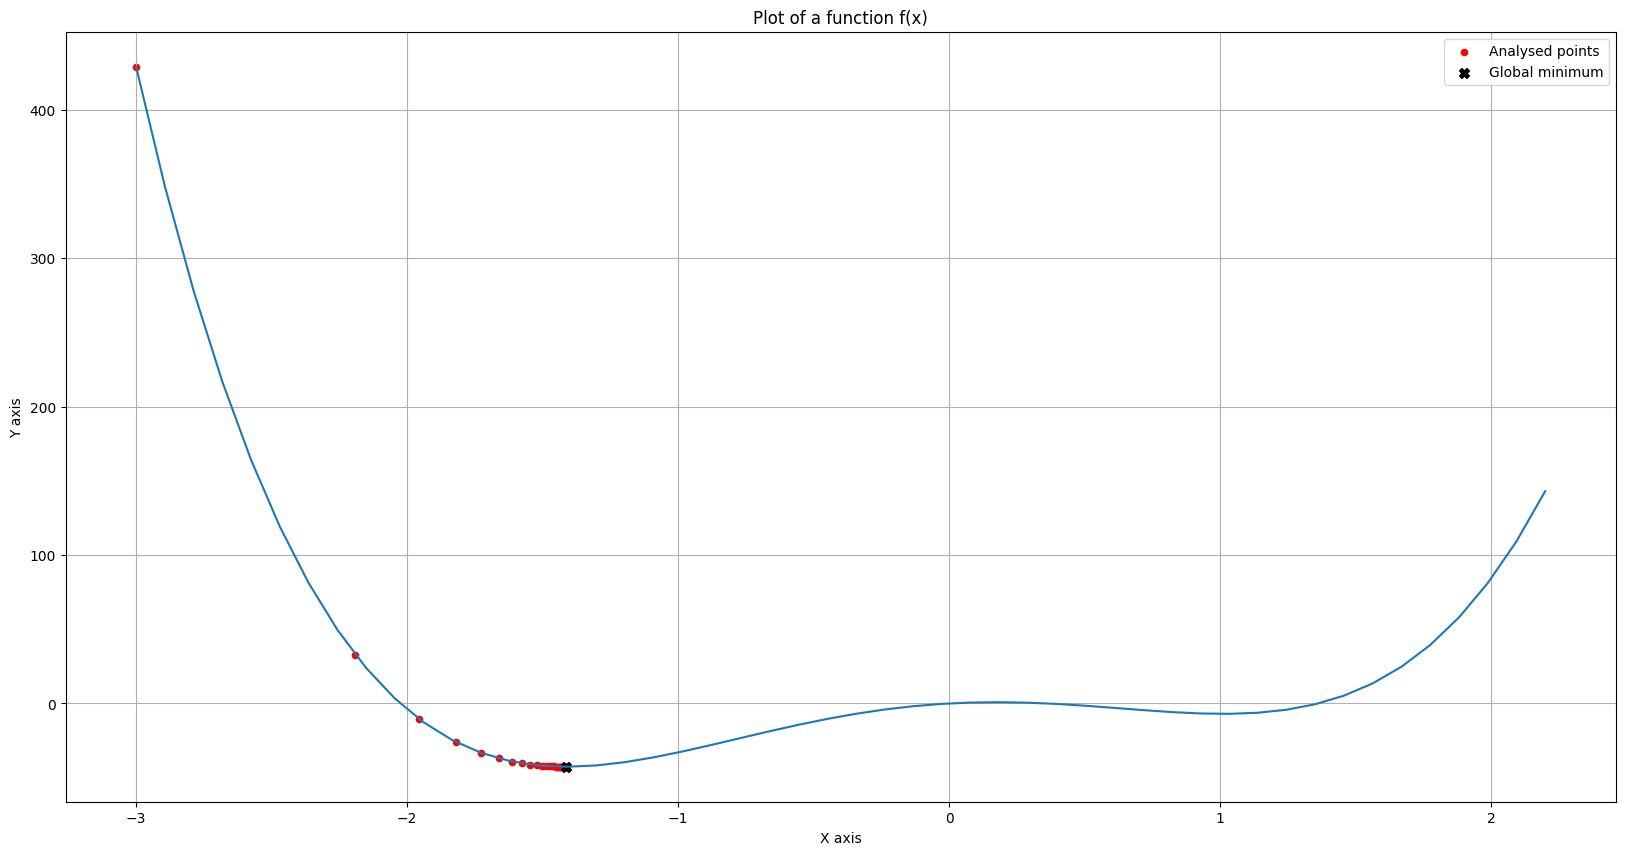

In [64]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)')
ax.grid()

path_to_minimum = ax.scatter(analysed_graph_points_2d, [f_function(x) for x in analysed_graph_points_2d], s=20, c='red', label="Analysed points")

marked_minimum = ax.scatter(x_minimum_2d, f_function(x_minimum_2d), marker="X", c="black", label="Global minimum", s=50)
legend = ax.legend(handles=[path_to_minimum, marked_minimum], loc='upper right')

plt.show()

### Dla funkcji dwóch zmiennych g(x)

Wyniki działania algorytmu najszybszego spadku dla funkcji dwóch zmiennych przypisujemy do zmiennych *analysed_graph_points_3d*, *local_minimum_3d* oraz *iterations_performed_3d* - dane te będą wykorzystane w generowaniu wykresu. 

In [86]:
analysed_graph_points_3d, local_minimum_3d, iterations_performed_3d = gradient_descent_3d(1, -2, 1, 0.001)
x_minimum_3d, y_minimum_3d = local_minimum_3d
z_minimum_3d = g_function(x_minimum_3d, y_minimum_3d)
algorithm_results(local_minimum_3d)

##### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji g(x)

Tworzymy dziedzinę i zbiór wartości funkcji g(x), dla których badany będzie algorytm najszybszego spadku.

In [87]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)

#### Wykres funkcji g(x) wraz z przebiegiem oraz wynikiem (szukanym minimum) działania algorytmu *najszybszego spadku* dla funkcji dwóch zmiennych

Podobnie jak we wcześniejszym podpunkcie generujemy wykres przebiegu algorytmu dla funkcji dwóch zmiennej g(x). Wielobarwne poziomice reprezentują wykres g(x), niebieskie kropki (ze względu na ich skupienie są one widoczne na wykresie jako linia ciągła) - kolejne badane przez algorytm punkty zaś czarny krzyżyk - znalezione przez algorytm minimum globalne.
<br><br>
Widzimy, że działanie algorytmu jest poprawne - funkcja "zatrzymuje się" w odpowiednim punkcie wykresu g(x).

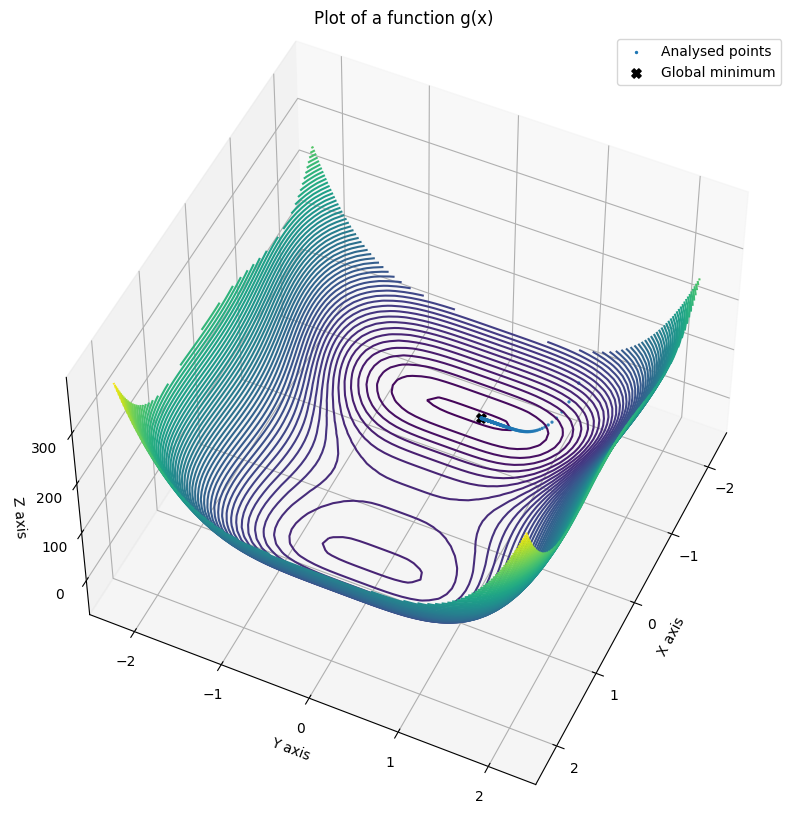

In [88]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 75, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

path_to_minimum = ax.scatter(analysed_graph_points_3d[0], analysed_graph_points_3d[1], [g_function(analysed_graph_points_3d[0][i], analysed_graph_points_3d[1][i]) for i in range(0, len(analysed_graph_points_3d[0]))], s=2,  label="Analysed points")

marked_minimum = ax.scatter(x_minimum_3d, y_minimum_3d, z_minimum_3d, marker="X", c="black", label="Global minimum", s=45)
ax.legend(handles=[path_to_minimum, marked_minimum], loc='upper right')


ax.view_init(50, 25)
plt.show()

## Badanie wpływu rozmiaru kroku na działanie algorytmu *najszybszego spadku*

Badania wpłuwu rozmiaru kroku wykonamy dla jednego - losowo wybranym punktu x == 1, y == -2, aby móc zilustrować wpływ różnych wartości *beta* na działanie oraz ostatecznie na wynik algorytmu.

### Dla funkcji jednej zmiennej f(x)

In [90]:
x_values = np.linspace(-2, 1.5, num=1000)
y_values = [f_function(x) for x in  x_values]

Wykonujemy algorytm najszybszego spadku dla tego samego punktu, lecz zmieniamy wartości *bety*. Rozpatrywane wartości w kolejności malejącej to:
1. *beta* = 0.02
2. *beta* = 0.01
3. *beta* = 0.003
4. *beta* = 0.001

In [91]:
analysed_graph_points_2d_3, local_minimum_2d_3, iterations_performed_2d_3 = gradient_descent_2d(1, -2, 0.02)
x_minimum_2d_3 = local_minimum_2d_3

analysed_graph_points_2d_4, local_minimum_2d_4, iterations_performed_2d_4 = gradient_descent_2d(1, -2, 0.01)
x_minimum_2d_4 = local_minimum_2d_4

analysed_graph_points_2d_5, local_minimum_2d_5, iterations_performed_2d_5 = gradient_descent_2d(1, -2, 0.003)
x_minimum_2d_5 = local_minimum_2d_5

analysed_graph_points_2d_6, local_minimum_2d_6, iterations_performed_2d_6 = gradient_descent_2d(1, -2, 0.001)
x_minimum_2d_6 = local_minimum_2d_6

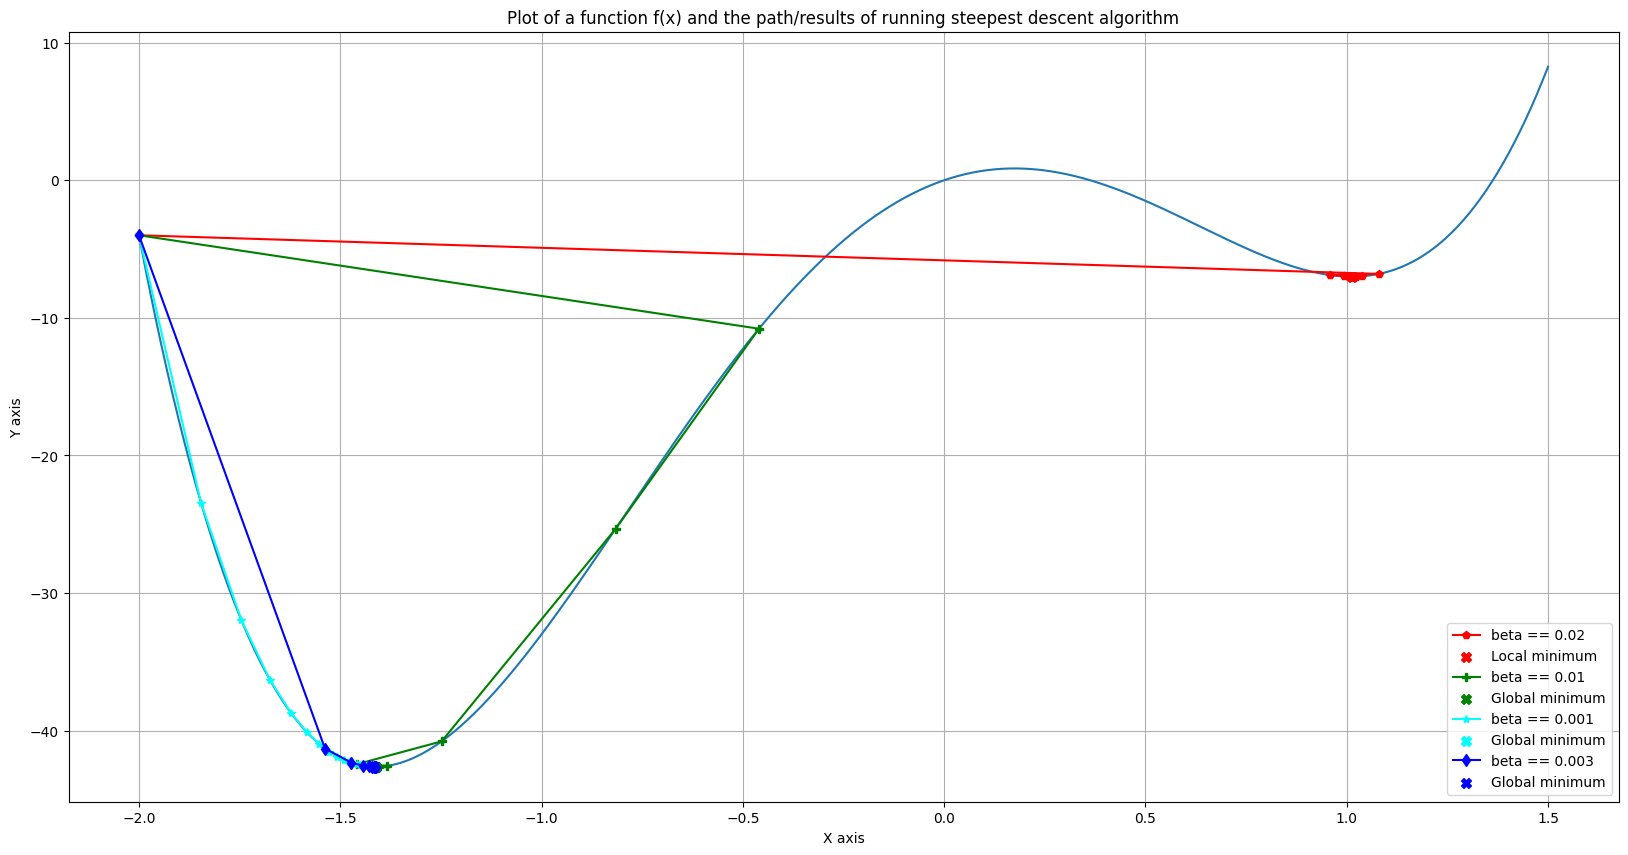

In [92]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x) and the path/results of running steepest descent algorithm')
ax.grid()


path_to_minimum_3 = ax.plot(analysed_graph_points_2d_3, [f_function(x) for x in analysed_graph_points_2d_3],  marker="p",  c="red", label="beta == 0.02")
marked_minimum_3 = ax.scatter(x_minimum_2d_3, f_function(x_minimum_2d_3), marker="X", c="red", label="Local minimum", s=50)


path_to_minimum_4 = ax.plot(analysed_graph_points_2d_4, [f_function(x) for x in analysed_graph_points_2d_4], marker="P",  c="green", label="beta == 0.01")
marked_minimum_4 = ax.scatter(x_minimum_2d_4, f_function(x_minimum_2d_4), marker="X", c="green", label="Global minimum", s=50)


path_to_minimum_6 = ax.plot(analysed_graph_points_2d_6, [f_function(x) for x in analysed_graph_points_2d_6], marker="*",  c="cyan", label="beta == 0.001")
marked_minimum_6 = ax.scatter(x_minimum_2d_6, f_function(x_minimum_2d_6), marker="X", c="cyan", label="Global minimum", s=50)

path_to_minimum_5 = ax.plot(analysed_graph_points_2d_5, [f_function(x) for x in analysed_graph_points_2d_5], marker="d",  c="blue", label="beta == 0.003"), 
marked_minimum_5 = ax.scatter(x_minimum_2d_5, f_function(x_minimum_2d_5), marker="X", c="blue", label="Global minimum", s=50)

ax.legend(loc='lower right')

plt.show()


##### Przykład otrzymania <font color=red>nieprawidłowej</font> wartości minimum globalnego z <font color=red>oscylacją</font> - dla *bety* = 0.02

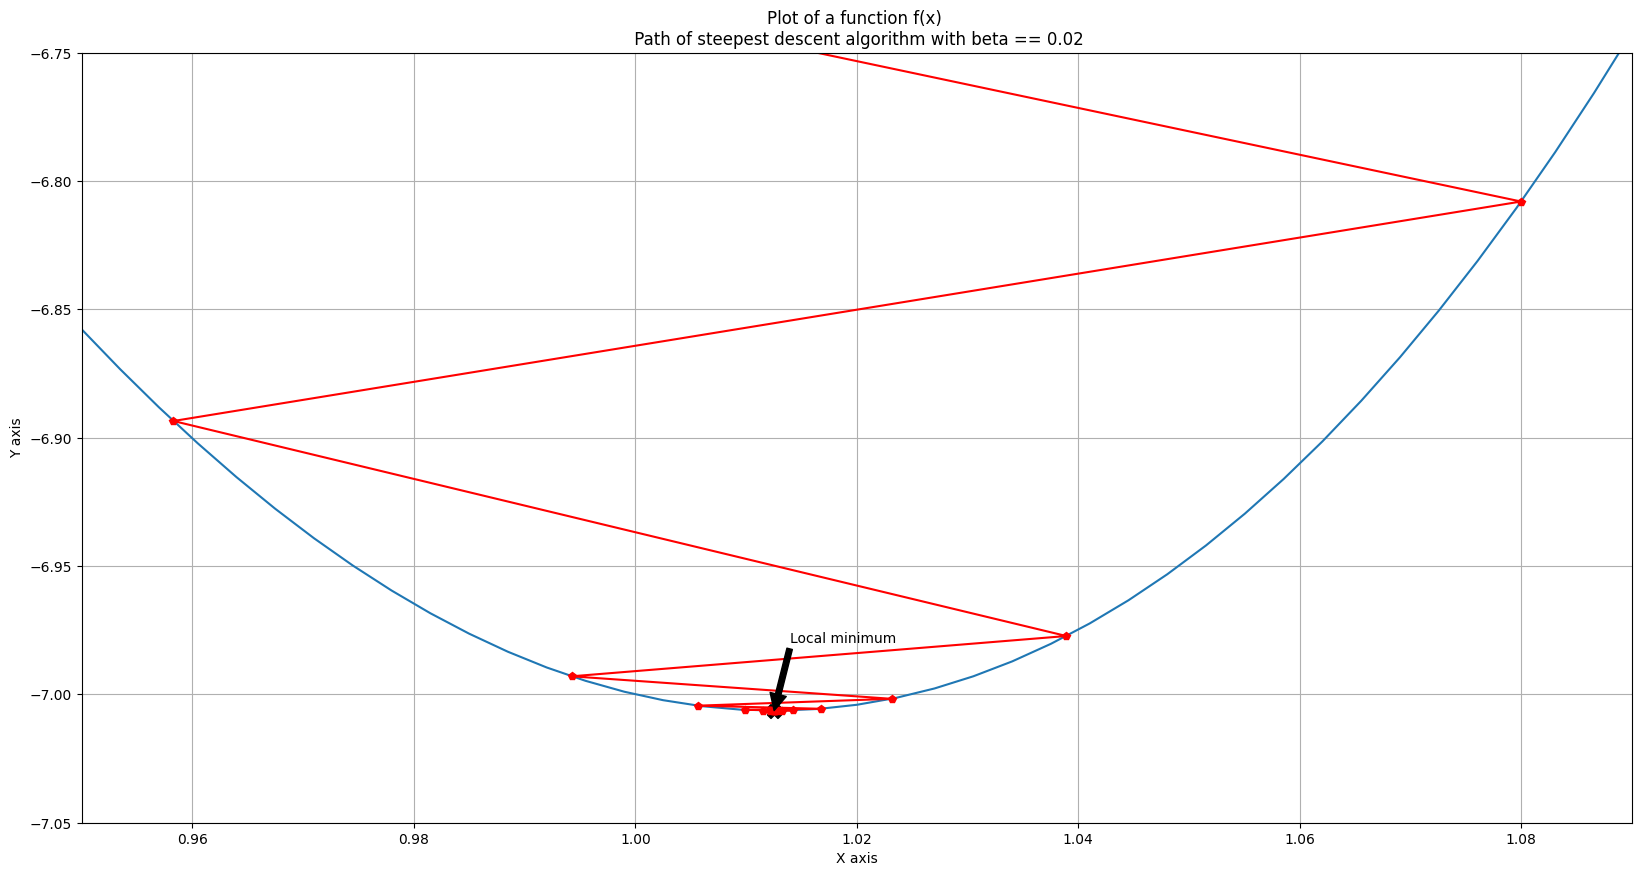

In [76]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x) \n Path of steepest descent algorithm with beta == 0.02')
ax.grid()

plt.xlim([0.95, 1.09])
plt.ylim([-7.05, -6.75])


path_to_minimum_3 = ax.plot(analysed_graph_points_2d_3, [f_function(x) for x in analysed_graph_points_2d_3],  marker="p",  c="red")
marked_minimum_3 = ax.scatter(x_minimum_2d_3, f_function(x_minimum_2d_3), marker="X", c="black", label="Global minimum", s=100)
ax = plt.annotate('Local minimum', xy =(x_minimum_2d_3, f_function(x_minimum_2d_3)), xytext =(1.014, -6.98), arrowprops = dict(facecolor ='black'))




plt.show()

##### Przykład otrzymania <font color=green>prawidłowej</font> wartości minimum globalnego z <font color=red>oscylacją</font> - dla *bety* = 0.01

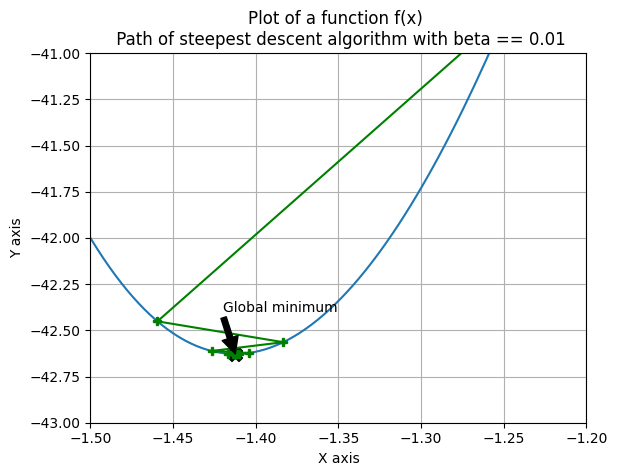

In [45]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x) \n Path of steepest descent algorithm with beta == 0.01')
ax.grid()

plt.xlim([-1.5, -1.2])
plt.ylim([-43, -41])


path_to_minimum_4 = ax.plot(analysed_graph_points_2d_4, [f_function(x) for x in analysed_graph_points_2d_4],  marker="P",  c="green")
marked_minimum_4 = ax.scatter(x_minimum_2d_4, f_function(x_minimum_2d_4), marker="X", c="black", label="Global minimum", s=100)
ax = plt.annotate('Global minimum', xy =(x_minimum_2d_4, f_function(x_minimum_2d_4)), xytext =(-1.42, -42.40), arrowprops = dict(facecolor ='black'))



plt.show()

##### W pełni poprawne działanie algorytmu - odnalezienie minimum <font color=green>globalnego</font> oraz <font color=green>brak</font> oscylacji dla *bety* = 0.003, 0.001.
##### Porównanie wpływu rozmiaru kroku na liczbę iteracji (wykonanych operacji algorytmu).

Niewielka zmiana w wartości współczynnika *beta* (różnica == 0.002) przyczyniła się do wydłużenia czasu działania algorytmu - wykonano ponad trzykrotnie więcej iteracji, choć w obu przypadkach otrzymano poprawny wynik działania algorytmu.

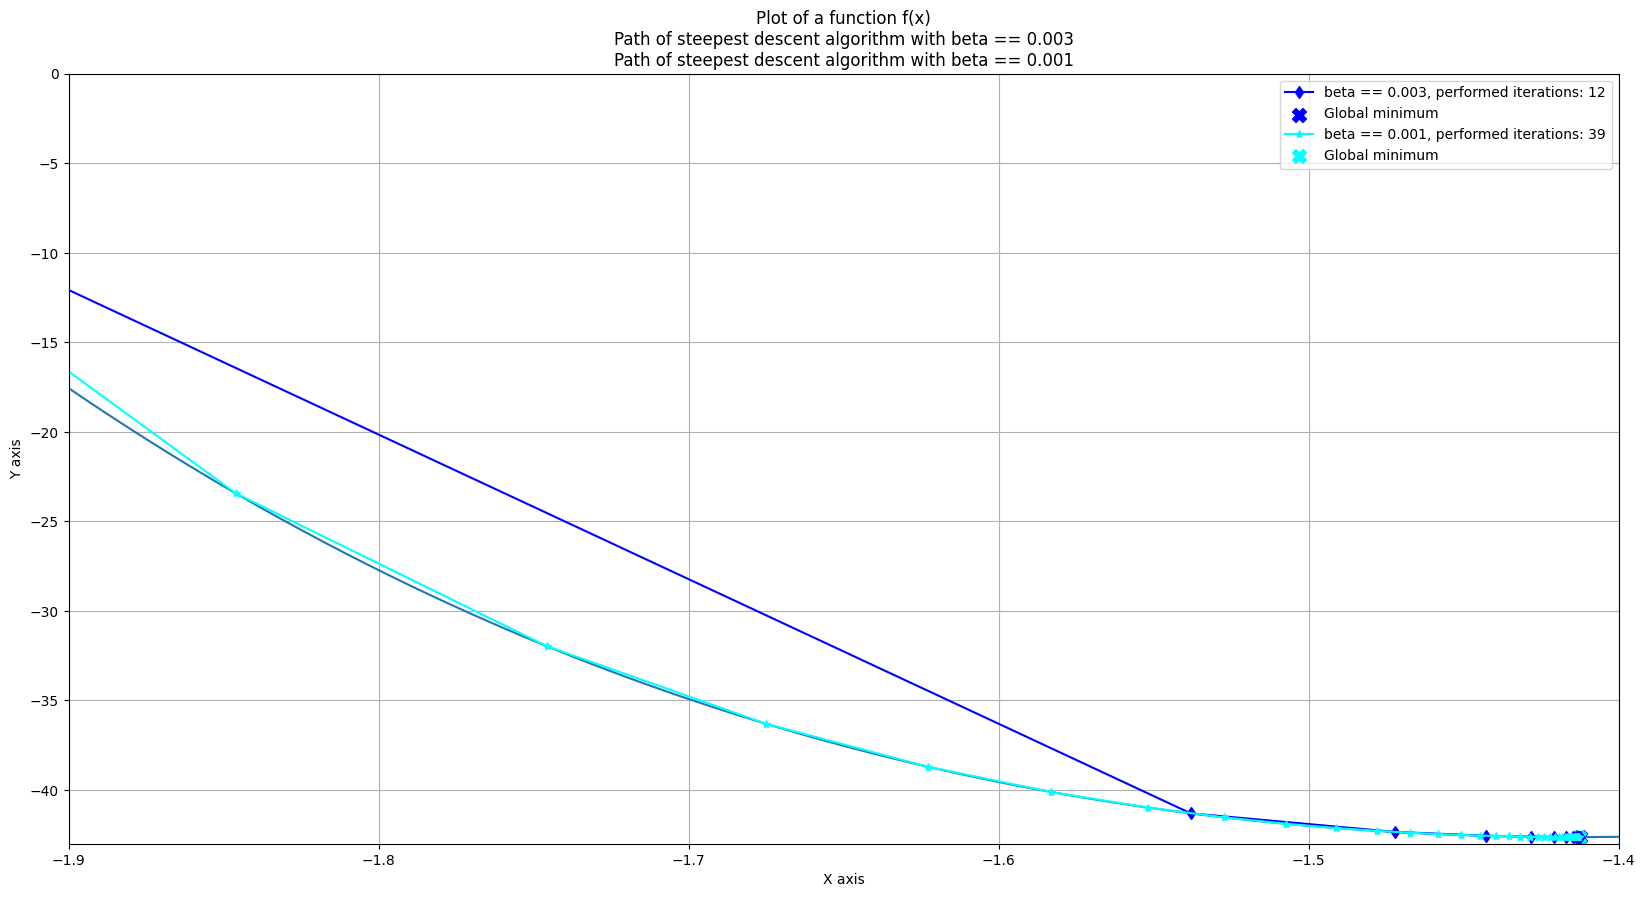

In [94]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)\nPath of steepest descent algorithm with beta == 0.003\nPath of steepest descent algorithm with beta == 0.001')
ax.grid()

plt.xlim([-1.9, -1.4])
plt.ylim([-43, 0])


path_to_minimum_5 = ax.plot(analysed_graph_points_2d_5, [f_function(x) for x in analysed_graph_points_2d_5],  marker="d", label="beta == 0.003, performed iterations: "+str(iterations_performed_2d_5), c="blue")
marked_minimum_5 = ax.scatter(x_minimum_2d_5, f_function(x_minimum_2d_5), marker="X", c="blue", label="Global minimum", s=100)

path_to_minimum_6 = ax.plot(analysed_graph_points_2d_6, [f_function(x) for x in analysed_graph_points_2d_6],  marker="*", label="beta == 0.001, performed iterations: "+str(iterations_performed_2d_6), c="cyan")
marked_minimum_6 = ax.scatter(x_minimum_2d_6, f_function(x_minimum_2d_6), marker="X", c="cyan", label="Global minimum", s=100)

ax.legend(loc='upper right')


plt.show()

#### Wnioski

Z powyższych badań wynika, że rozmiar kroku - wartości beta ma znaczący wpływ na działanie algorytmu najszybszego spadku. 
- Przy dużej wartości beta może dojść do sytuacji, w której algorytm "przeskoczy" minimum globalne i w swym przebiegu nie zauważy jego "pominięcia/przeoczenia", a co za tym idzie wskaże inne, błędnie miejsce występowania minimum globalnego (będzie to lokalne minimum).
- Zbyt mały współczynnik może przyczynić się do znaczącego wydłużenia pracy algorytmu. Niekiedy algorytm dla współczynników o większej wartości wykonuje równie dobrze obliczenia minimum globalnego jak i dla tych mniejszych wartości, lecz wykonuje to sprawniej i w mniejszej liczbie iteracji. Choć mogłoby się omylnie wydawać to wybór jak najmniejszej wartości współczynnika beta może wpływać niekorzystnie na pracę algorytmu.
\n
- Przy doborze współczynnika beta do algorytmu najniższego spadku każda funkcja powinna być rozpatrywana indywidualnie. Nie istnieje jednoznaczna metoda doboru wielkości kroku, aby dla każdej funkcji oraz wybranego punktu startowego algorytm generował zadowalające wyniki.

### Dla funkcji dwóch zmiennych g(x)

(Postępujemy analogicznie jak w przypadku funkcji jednej zmiennej.)

In [96]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)

In [97]:
analysed_graph_points_3d_1, local_minimum_3d_1, iterations_performed_3d_1 = gradient_descent_3d(1, 1, 1, 0.0245)
x_minimum_3d_1, y_minimum_3d_1 = local_minimum_3d_1
z_minimum_3d_1 = g_function(x_minimum_3d_1, y_minimum_3d_1)

analysed_graph_points_3d_2, local_minimum_3d_2, iterations_performed_3d_2 = gradient_descent_3d(1, 1, 1, 0.01)
x_minimum_3d_2, y_minimum_3d_2 = local_minimum_3d_2
z_minimum_3d_2 = g_function(x_minimum_3d_2, y_minimum_3d_2)

analysed_graph_points_3d_3, local_minimum_3d_3, iterations_performed_3d_3 = gradient_descent_3d(1, 1, 1, 0.003)
x_minimum_3d_3, y_minimum_3d_3 = local_minimum_3d_3
z_minimum_3d_3 = g_function(x_minimum_3d_3, y_minimum_3d_3)

analysed_graph_points_3d_4, local_minimum_3d_4, iterations_performed_3d_4 = gradient_descent_3d(1, 1, 1, 0.001)
x_minimum_3d_4, y_minimum_3d_4 = local_minimum_3d_4
z_minimum_3d_4 = g_function(x_minimum_3d_4, y_minimum_3d_4)

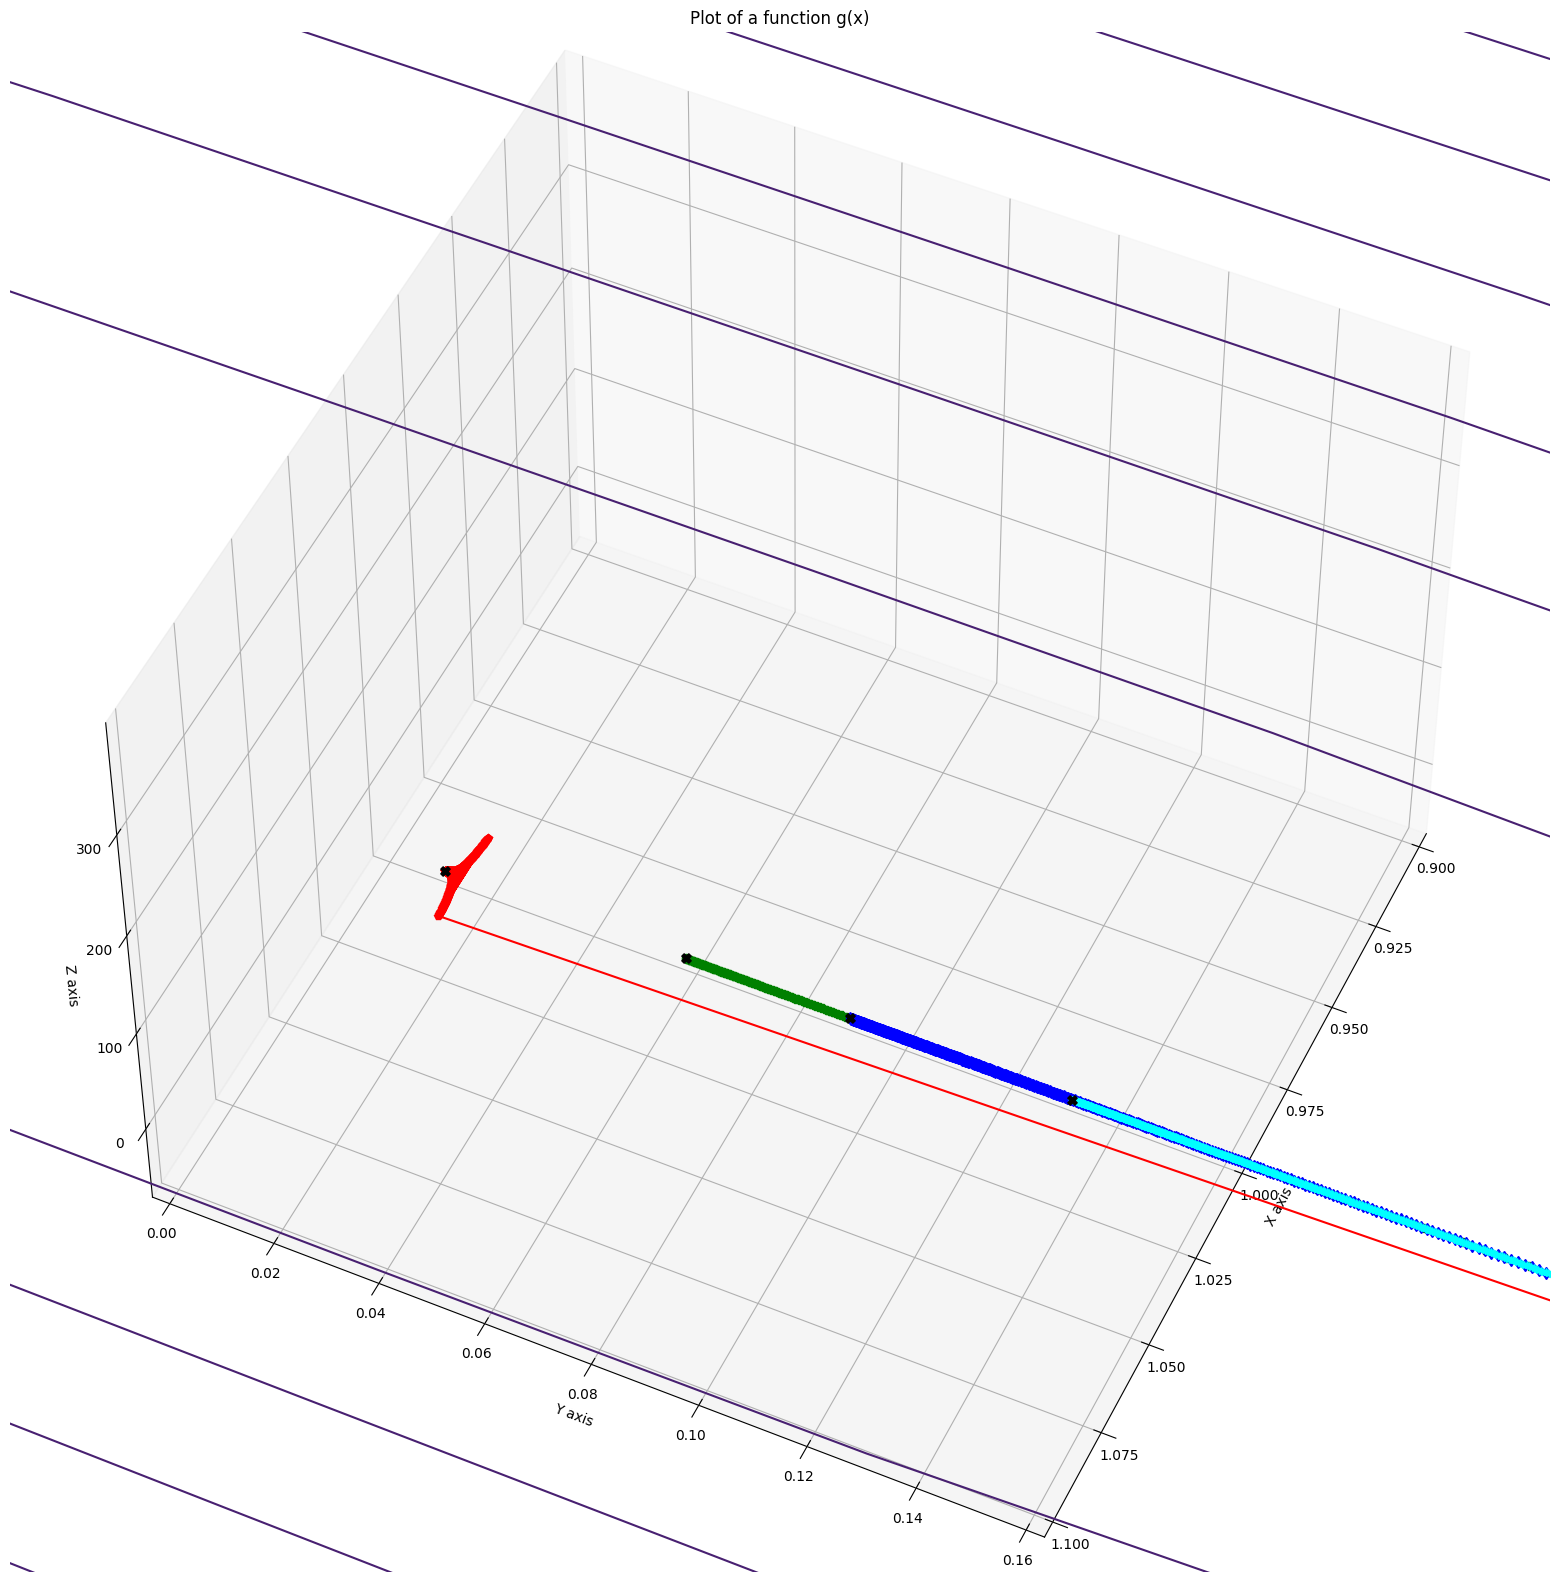

In [101]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (40,20)
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 1000, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

plt.xlim([0.9, 1.1])
plt.ylim([0, 0.16])


path_to_minimum_1 = ax.plot3D(analysed_graph_points_3d_1[0], analysed_graph_points_3d_1[1], [g_function(analysed_graph_points_3d_1[0][i], analysed_graph_points_3d_1[1][i]) for i in range(0, len(analysed_graph_points_3d_1[0]))], marker="p",  c="red")
marked_minimum_1 = ax.scatter(x_minimum_3d_1, y_minimum_3d_1, z_minimum_3d_1, marker="X", c="black", label="Global minimum", s=45)

path_to_minimum_2 = ax.plot3D(analysed_graph_points_3d_2[0], analysed_graph_points_3d_2[1], [g_function(analysed_graph_points_3d_2[0][i], analysed_graph_points_3d_2[1][i]) for i in range(0, len(analysed_graph_points_3d_2[0]))], marker="P",  c="green")
marked_minimum_2 = ax.scatter(x_minimum_3d_2, y_minimum_3d_2, z_minimum_3d_2, marker="X", c="black", label="Global minimum", s=45)

path_to_minimum_3 = ax.plot3D(analysed_graph_points_3d_3[0], analysed_graph_points_3d_3[1], [g_function(analysed_graph_points_3d_3[0][i], analysed_graph_points_3d_3[1][i]) for i in range(0, len(analysed_graph_points_3d_3[0]))], marker="d",  c="blue")
marked_minimum_3 = ax.scatter(x_minimum_3d_3, y_minimum_3d_3, z_minimum_3d_3, marker="X", c="black", label="Global minimum", s=45)

path_to_minimum_4 = ax.plot3D(analysed_graph_points_3d_4[0], analysed_graph_points_3d_4[1], [g_function(analysed_graph_points_3d_4[0][i], analysed_graph_points_3d_4[1][i]) for i in range(0, len(analysed_graph_points_3d_4[0]))], marker="*",  c="cyan")
marked_minimum_4 = ax.scatter(x_minimum_3d_4, y_minimum_3d_4, z_minimum_3d_4, marker="X", c="black", label="Global minimum", s=45)


ax.view_init(50, 25)
plt.show()